In [1]:
"""
Project Overview
    1.Import Modules
    2.Load Dataset
    3.View properties of the dataset --Describe, info, columns, shape.
    4.Data Cleaning.
        a) Distinct Values.
        b) Columns
        c) Null Values, Consequential Columns, Fill with Mode/ Median/ Unknown or Drop them
        d) Duplicates - Drop them
        e) Getting rid of outliers in numeric columns
        f) Cap Consequetial Columns for model accuracy
        g)Check again for nulls and duplicates
    5.Exploratory Data Analysis
        a) Check for residual outliers
        b) Correlation in numerical columns
        c) Checking the target variable
        d) Comparing Numerical Columns vs Target
        e) Comparing Categorical features vs Target
        f) Logging Observations
    6. Modelling
        a) Import scikit-learn and required modules eg LogisticRegression etc
        b) Remove columns that dont affect the target variable
        c) Check shape
        d) Convert non-numerical data to numerical data
        e) Merging encoded data with the original dataset
        f) Dropping encoded/ categorical columns
        g) Splitting Target from features
        h) Importing the Models
        i) Check Shape of the split data 8:2
        j) importing Scaler & selecting features for deployment
        k) Scaling the selected features
        l) Create the training model
        m) Predict using said model
        n) Check the Accuracy of the Model
        o) Confusion Matrix and Classification Report
        p) Deploy the model
        q) Check for overfitting 
    7. Deployment using pickle 
        a) use pickle to dump the models 
        b) locate the models in your project folder
        c) Use streamlit or HTML to build an App UI that will allow users to use the app without needing the notebook
"""

'\nProject Overview\n    1.Import Modules\n    2.Load Dataset\n    3.View properties of the dataset --Describe, info, columns, shape.\n    4.Data Cleaning.\n        a) Distinct Values.\n        b) Columns\n        c) Null Values, Consequential Columns, Fill with Mode/ Median/ Unknown or Drop them\n        d) Duplicates - Drop them\n        e) Getting rid of outliers in numeric columns\n        f) Cap Consequetial Columns for model accuracy\n        g)Check again for nulls and duplicates\n    5.Exploratory Data Analysis\n        a) Check for residual outliers\n        b) Correlation in numerical columns\n        c) Checking the target variable\n        d) Comparing Numerical Columns vs Target\n        e) Comparing Categorical features vs Target\n        f) Logging Observations\n    6. Modelling\n        a) Import scikit-learn and required modules eg LogisticRegression etc\n        b) Remove columns that dont affect the target variable\n        c) Check shape\n        d) Convert non-nume

In [ ]:
# Step 1: Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,accuracy_score, classification_report, roc_curve, confusion_matrix


# For path handling
from pathlib import Path


In [ ]:
# Sub-step Build the PATH to avoid hardcoding
project_root = Path.cwd().parent
data_path = project_root / "Churn" / "Data" / "Churn.csv"
print(data_path)  

c:\Users\HP\Projects\Churn\Data\Churn.csv


In [4]:
#Step 2: Load Dataset
df = pd.read_csv(data_path)
pd.set_option('display.max_columns', None)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#Step 3: View properties of the dataset
print(df.describe())  
print(df.columns.to_list())
print(df.shape)


         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

## 4. Data Cleaning.

In [12]:
#For safety we will copy the original dataset to prevent interpolations
data=df.copy(deep=True)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# 4.a Checking for distinct values
for column in data:
    distinct=data[column].unique()
    print(f"Distinct values in {column} '\n' : {distinct}")

Distinct values in RowNumber '
' : [    1     2     3 ...  9998  9999 10000]
Distinct values in CustomerId '
' : [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Distinct values in Surname '
' : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Distinct values in CreditScore '
' : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 71

In [14]:
#4.b Check Columns
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#4.c Check Nulls 
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
#Substep 4.c Drop Inconsiquentials
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [17]:
#4.d Check for duplicates
dupes = data.duplicated().sum()
data = data.drop_duplicates()
print(dupes)

0


In [20]:
#4.e Checking and getting rid of outliers
#Outliers only exist in columns with numeric info
#Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

#Loop through numeric columns and check outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    interquartile_range = Q3 - Q1
    lower_bound = Q1 - 1.5 * interquartile_range
    upper_bound = Q3 + 1.5 * interquartile_range
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


RowNumber: 0 outliers
CustomerId: 0 outliers
CreditScore: 15 outliers
Age: 359 outliers
Tenure: 0 outliers
Balance: 0 outliers
NumOfProducts: 60 outliers
HasCrCard: 0 outliers
IsActiveMember: 0 outliers
EstimatedSalary: 0 outliers
Exited: 2037 outliers


In [21]:
#4.f Capping Consequentials 
# Capping valid numeric features only
cols_to_cap = ['CreditScore', 'Age', 'NumOfProducts']

for col in cols_to_cap:
    lower_cap = df[col].quantile(0.01)
    upper_cap = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_cap, upper_cap)

print("Outliers capped for:", cols_to_cap)


Outliers capped for: ['CreditScore', 'Age', 'NumOfProducts']


In [26]:
#4.f -Check shape and nulls
data.shape
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 5. Exploratory Data Analysis

In [28]:
#5.a Residual Outliers
df2 = data.copy(deep=True)
df2.info()
df2.describe().T
df2.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

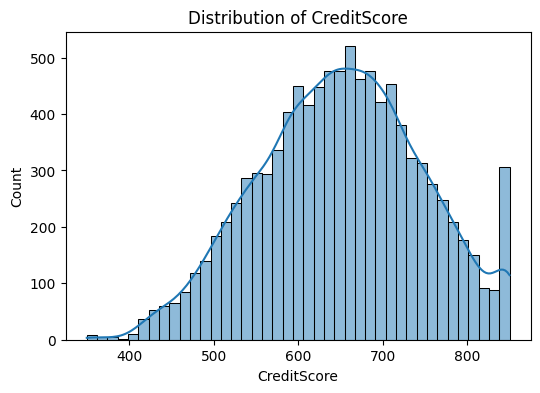

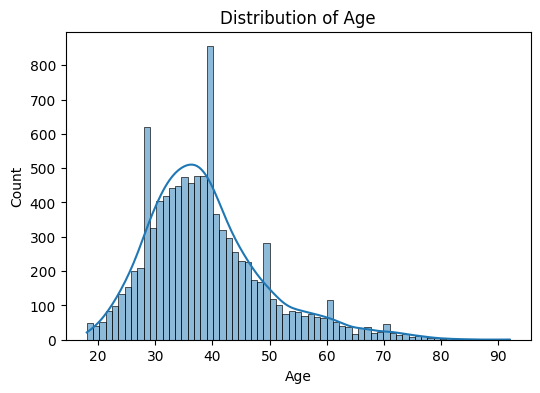

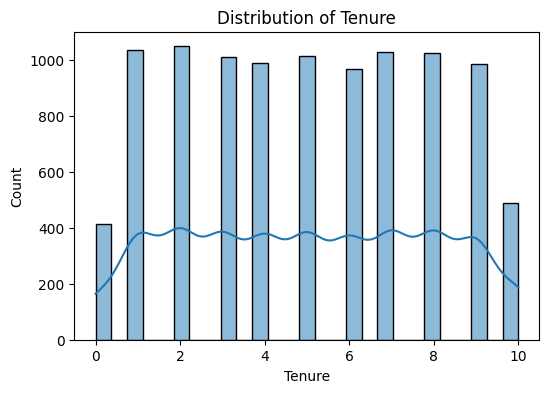

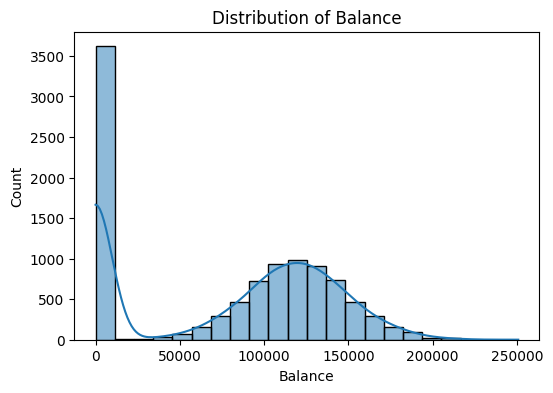

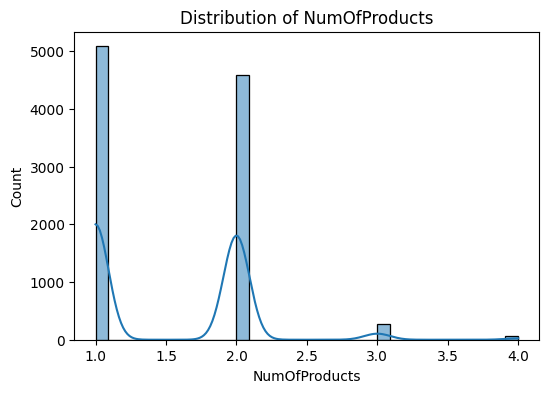

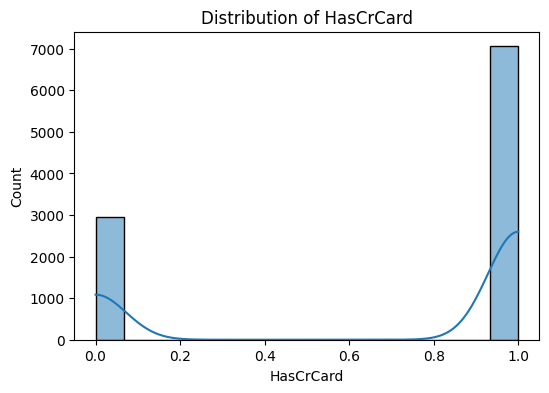

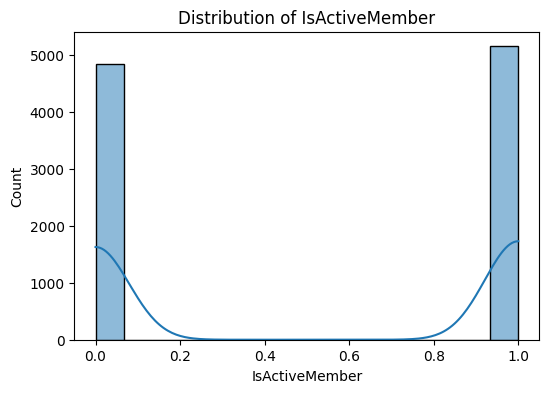

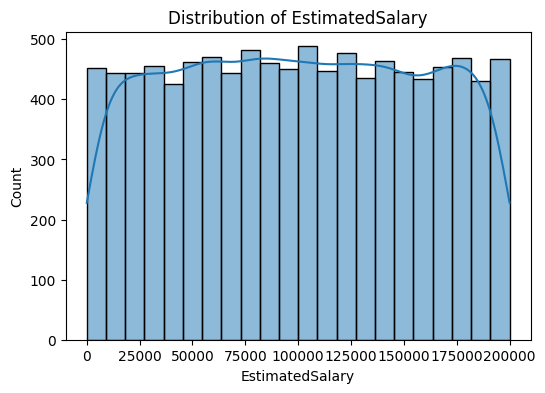

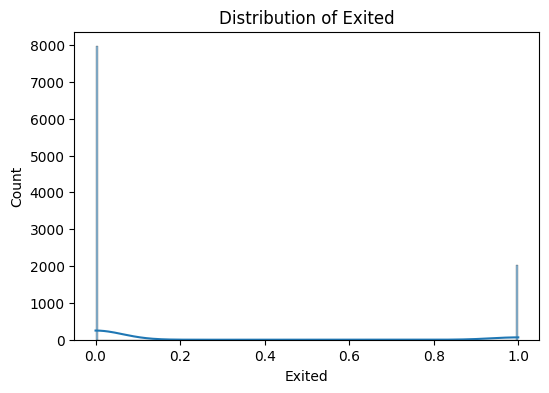

In [29]:
#Substep 5.a Checking for Residual Outliers
num_cols = df2.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df2[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


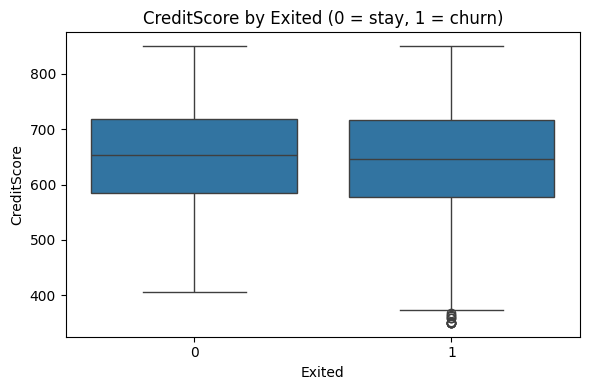

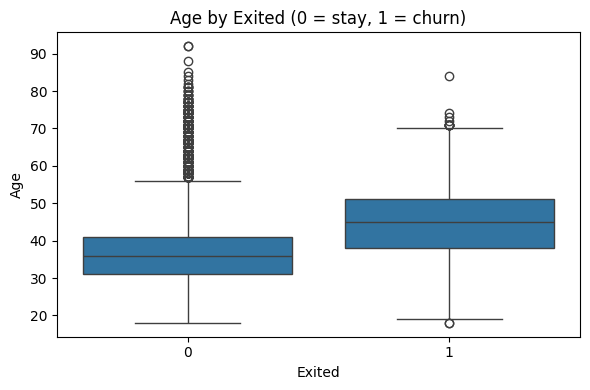

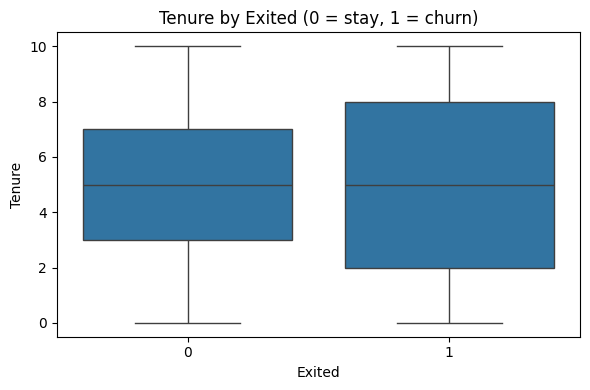

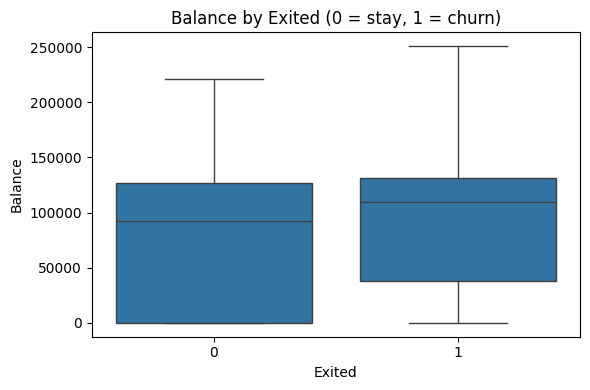

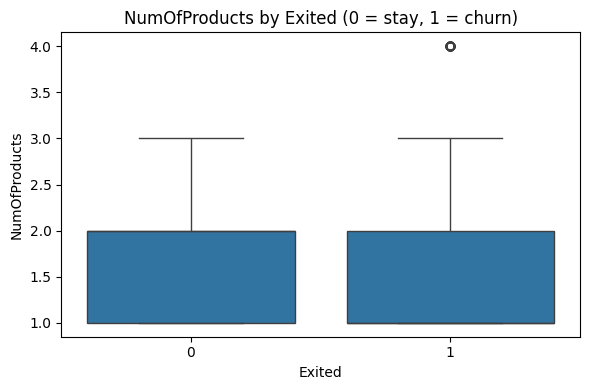

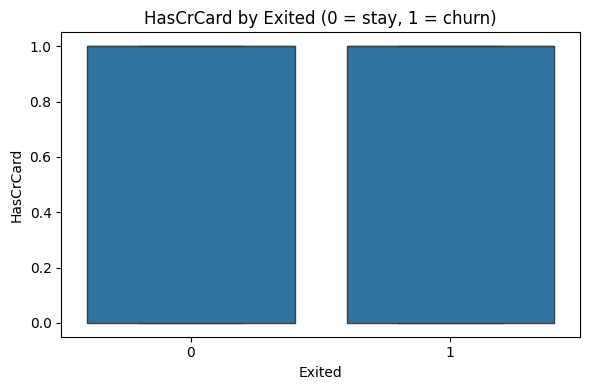

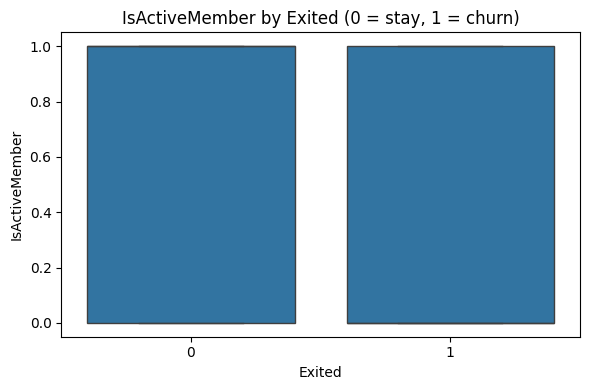

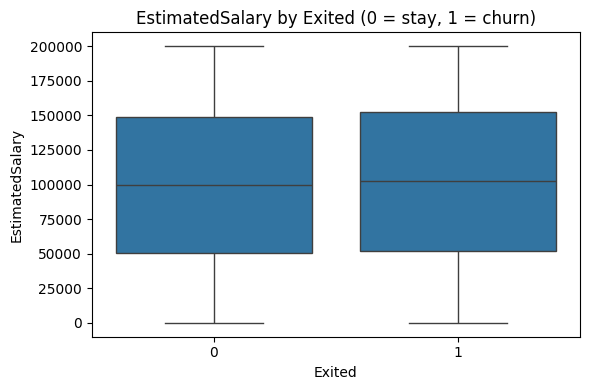


Median by Exited:
Exited                  0          1
CreditScore        653.00     646.00
Age                 36.00      45.00
Tenure               5.00       5.00
Balance          92072.68  109349.29
NumOfProducts        2.00       1.00
HasCrCard            1.00       1.00
IsActiveMember       1.00       0.00
EstimatedSalary  99645.04  102460.84

Mean by Exited:
Exited                      0              1
CreditScore        651.853196     645.351497
Age                 37.408389      44.837997
Tenure               5.033279       4.932744
Balance          72745.296779   91108.539337
NumOfProducts        1.544267       1.475209
HasCrCard            0.707146       0.699067
IsActiveMember       0.554565       0.360825
EstimatedSalary  99738.391772  101465.677531


In [32]:
# 5.d numeric columns except the target
num_cols = df2.select_dtypes(include=['int64','float64']).columns.drop('Exited')

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Exited', y=col, data=df2)
    plt.title(f'{col} by Exited (0 = stay, 1 = churn)')
    plt.tight_layout()
    plt.show()

# summary statistics by target to help interpretation
print("\nMedian by Exited:")
print(df2.groupby('Exited')[num_cols].median().T)

print("\nMean by Exited:")
print(df2.groupby('Exited')[num_cols].mean().T)

#  Observations
1. Customers with weaker credit scores are a bit more likely to leave.
2. Older customers are much more likely to churn.
3. Tenure doesn’t seem to drive churn much.
4. Higher balance Customers tend to leave more. -Interesting, Hmmm
5. Cross-selling seems protective, customers with multiple products stick around.
6. Having a credit card doesn’t affect churn much. Likely a weak feature.
7. Salary doesn’t affect churn at least not directly or in any noticeable way. - Interesting too

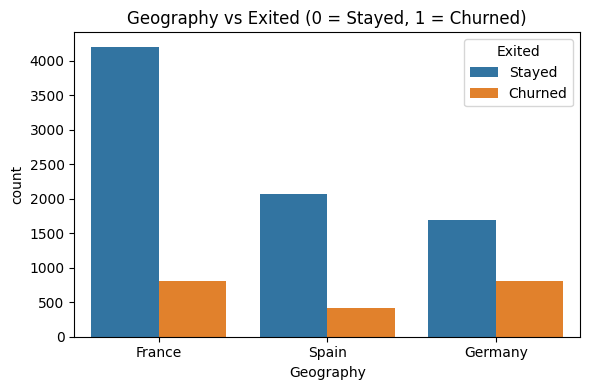

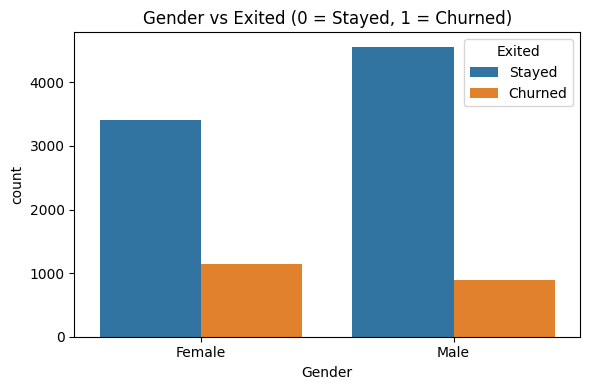

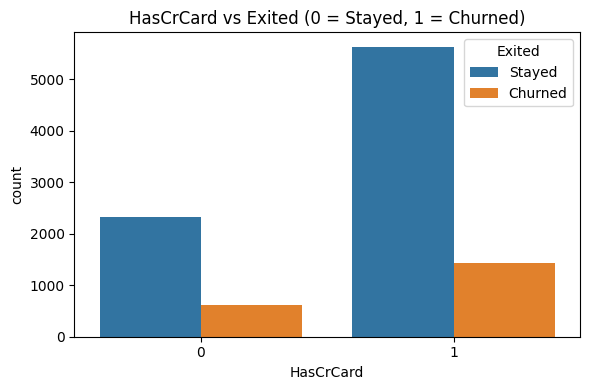

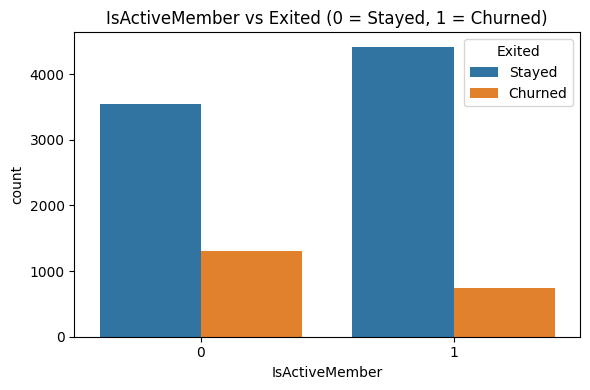


Churn Rate by Geography:
Geography
France     16.15
Germany    32.44
Spain      16.67
Name: Exited, dtype: float64%

Churn Rate by Gender:
Gender
Female    25.07
Male      16.46
Name: Exited, dtype: float64%

Churn Rate by HasCrCard:
HasCrCard
0    20.81
1    20.18
Name: Exited, dtype: float64%

Churn Rate by IsActiveMember:
IsActiveMember
0    26.85
1    14.27
Name: Exited, dtype: float64%


In [33]:

# Step 5.c: Categorical vs Attrition
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember' ]

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Exited', data=df2)
    plt.title(f'{col} vs Exited (0 = Stayed, 1 = Churned)')
    plt.legend(title='Exited', labels=['Stayed', 'Churned'])
    plt.tight_layout()
    plt.show()

# Optional: display churn rates by category
for col in cat_cols:
    churn_rate = df2.groupby(col)['Exited'].mean() * 100
    print(f"\nChurn Rate by {col}:\n{churn_rate.round(2)}%")


## Observations
1. Germany’s churn rate (32.4%) is double that of France or Spain (~16%).
2. Females churn more (25%) than males (16%).
3. HasCrCard wont be predictive; barely any difference, both around 20%.
4. IsActiveMember shows a huge difference; inactive members churn almost 2 times as much.

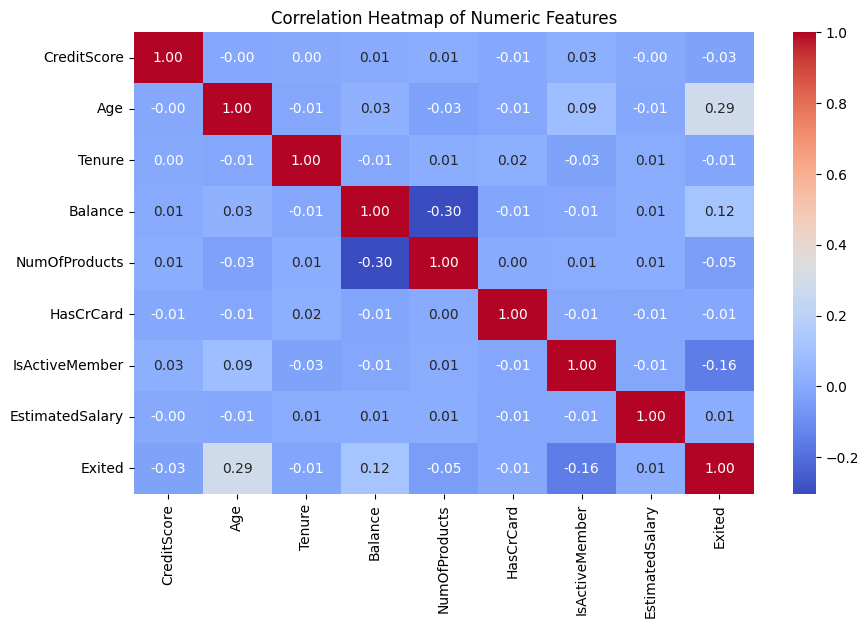

In [34]:
# Substep 5.b: Correlation Heatmap (Numeric Columns Only)
plt.figure(figsize=(10,6))
sns.heatmap(df2.select_dtypes(include=['int64', 'float64']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Columns not affecting the target variable are as follows
1. HasCrCard
2. Surname
3. RowNumber
4. Tenure
5. CustomerId


## 6. Modelling

In [39]:
#6.a Imports applied at the beginning
#6.b Removing Inconsequential Columns from the dataset
df2.shape
df2.head(4)
df2.columns
df2 = df2.drop(['HasCrCard', 'Tenure'], axis=1)

In [42]:
#6.d Converting non-numercal data to numerical
nnc= df2.select_dtypes(exclude=['number']).columns
print(nnc)
df2_dummy = pd.get_dummies(df2[nnc], drop_first=True, dtype='int')


Index(['Geography', 'Gender'], dtype='object')


In [ ]:
#6.e Merging the encoded data to the original dataset
df2_merged = pd.concat([df2_dummy, df2], axis=1)
df2_merged.head(3)

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,France,Female,42,0.00,1,1,101348.88,1
1,0,1,0,608,Spain,Female,41,83807.86,1,1,112542.58,0
2,0,0,0,502,France,Female,42,159660.80,3,0,113931.57,1


In [45]:
#6.f Drop original categorical columns
df2_merged = df2_merged.drop(columns=nnc)
df2_merged.head(3)


,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,0.00,1,1,101348.88,1
1,0,1,0,608,41,83807.86,1,1,112542.58,0
2,0,0,0,502,42,159660.80,3,0,113931.57,1


In [48]:
#6.g Splitting Target from featuresd
x = df2_merged.drop(columns=['Exited'], axis=1)
y = df2_merged['Exited']    

x.shape, y.shape

((10000, 9), (10000,))

In [49]:
#6.h Importing the models
from sklearn.model_selection import train_test_split

#splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [50]:
#6.i checking the shape of the split data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7000, 9), (7000,), (3000, 9), (3000,))

In [53]:
#6.j  importing scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# select the necessary features for deployment
selected_feat = [
    'Geography_Germany',
    'Geography_Spain',
    'Gender_Male',
    'CreditScore',
    'Age',
    'Balance',
    'NumOfProducts',
    'IsActiveMember',
    'EstimatedSalary'
]

X_train_select = x_train[selected_feat]




In [54]:
#6.k Scaling the features --> original
scl = StandardScaler()
x_train_s = scl.fit_transform(x_train)
x_test_s = scl.transform(x_test)

#deployed
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train_select)

## Logistic Regression Model

In [55]:
#6.l creating and training the model
model1 = LogisticRegression()
model1.fit(x_train_s, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [56]:
#6.m predict the model
y_pred = model1.predict(x_test_s)

In [57]:
#6.n check the acccuracy
print(f'The accuracy score is {accuracy_score(y_test, y_pred)*100:.2f}%')

The accuracy score is 81.40%


In [59]:
#6.o confusion matrix
confusion_matrix(y_test, y_pred)

array([[2319,   97],
       [ 461,  123]])

In [60]:
#6.o classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.56      0.21      0.31       584

    accuracy                           0.81      3000
   macro avg       0.70      0.59      0.60      3000
weighted avg       0.78      0.81      0.78      3000



In [61]:
#6.p deploy model
modela = LogisticRegression()
modela.fit(X_train_sc, y_train)

print(f'The accuracy score is {accuracy_score(y_test, y_pred)*100:.2f}%')

The accuracy score is 81.40%


## Extra Models : XGBOOST

In [62]:
#call  xgboost classifier
from xgboost import XGBClassifier

#creating the model
model4 = XGBClassifier()

#training the model
model4.fit(x_train_s,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [63]:
#pedicting the model
y_pred2 = model4.predict(x_test_s)

In [64]:
#finding the accuracy score
print(f'The accuracy score is {accuracy_score(y_test, y_pred2)*100:.2f}%')

The accuracy score is 86.43%


In [65]:
#confusion matrix
confusion_matrix(y_test, y_pred2)

array([[2305,  111],
       [ 296,  288]])

In [66]:
#classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2416
           1       0.72      0.49      0.59       584

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [69]:
# Check for overfitting
train_acc = accuracy_score(y_train, model4.predict(x_train_s))
test_acc = accuracy_score(y_test, model4.predict(x_test))

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")

if train_acc > test_acc + 0.1:
    print('Model might be overfitting.')

Training Accuracy: 0.95
Test Accuracy: 0.78
Model might be overfitting.


In [70]:
# deployed
modelb = XGBClassifier()
modelb.fit(X_train_sc, y_train)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


# Extra Models: Random Forest

In [72]:
#creating and training the model
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier()
model3.fit(x_train_s, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
#getting the prediction
y_pred3 = model3.predict(x_test_s)

In [74]:
#getting the model accuracy
print(f'The accuracy score is :{accuracy_score(y_test, y_pred)*100:.2f}%')

The accuracy score is :81.40%


In [75]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[2319,   97],
       [ 461,  123]])

In [76]:
# deployed
modelc = RandomForestClassifier()
modelc.fit(X_train_sc, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
import pickle


# --- Save all models and scaler ---
with open('lgmodel.pkl', 'wb') as f:
    pickle.dump(modela, f)
with open('xgmodel.pkl', 'wb') as f:
    pickle.dump(modelb, f)
with open('rfmodel.pkl', 'wb') as f:
    pickle.dump(modelc, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scale, f)

In [78]:
import os
print(os.getcwd())


c:\Users\HP\Projects\Churn
